In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import networkx as nx
from pyvis.network import Network
import os
import unicodedata
import collections
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

## Chargement des données

In [3]:
deal = pd.read_csv("../Base_de_donnees/alliances_tech_e.csv",sep=",", encoding="utf-8-sig")
deal.head()

,Entreprise A,Entreprise B,Type d'alliance,Date,Concurrence,Explication alliance,Source,commentaire
0,Adobe,Figma,Tentative d'acquisition,NaN,NaN,Tentative d’acquisition stratégique - annulée,https://www.forbes.fr/business/adobe-met-fin-a...,NaN
1,Alibaba,Baidu,Accord de coopération stratégique,NaN,NaN,Collaboration sur IA générative,https://consent.yahoo.com/v2/collectConsent?se...,NaN
2,Alibaba,Apple,Accord de coopération stratégique,NaN,NaN,Partenariat sur l'IA en Chine,https://www.lesechos.fr/tech-medias/intelligen...,NaN
3,Amazon,Nvidia,Accord de coopération stratégique,NaN,NaN,Partenariat sur cloud et GPU pour IA générativ...,https://www.tradingsat.com/amazoncom-US0231351...,partenaire depuis 14ans
4,Amazon,Verizon,Accord de coopération stratégique,NaN,NaN,Partenariat edge computing 5G,https://www.cnbc.com/2021/10/26/verizon-partne...,NaN


In [4]:
display((deal["Entreprise A"].unique()))

array(['Adobe', 'Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'AWS',
       'Baidu', 'Broadcom', 'BYD', 'ByteDance', 'Capgemini', 'Databricks',
       'Ericsson', 'Google', 'Google DeepMind (A)', 'Huawei', 'IBM',
       'Open AI ', 'Intel', 'Lyft ', 'Microsoft', 'MediaTek', 'Meta',
       'Netflix', 'Nokia', 'Nvidia', 'Nvidia ', 'OpenAI', 'OpenAI ',
       'Oracle', 'Pinterest', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony ', 'Sony', 'Spotify', 'Tesla',
       'Tesla ', 'Thales', 'TSMC', 'Uber', 'Waymo', 'Toyota', 'Honda',
       'Cruise', 'Red Hat', 'Arm', 'Mercedes-Benz', 'ASML', 'SAP',
       'Deepseek'], dtype=object)

In [5]:
display((deal["Entreprise B"].unique()))

array(['Figma', 'Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face',
       'SAP', 'Anthropic', 'TSMC', 'Salesforce', 'Google Cloud',
       'Broadcom', 'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek',
       'Amazon', 'Cloud4C', 'WNC', 'DeltaCapita', 'Microsoft', 'Orange',
       'Samsung', 'Oxford University (B)', 'Tencent', 'Vodafone Group',
       'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI', 'AWS', 'CoreWeave',
       'Facebook', 'OpenAI', 'AT&T', 'Databricks', 'GitHub', 'Yahoo',
       'Google', 'Arm', 'Intel', 'AMD', 'Alphabet ', 'ByteDance',
       'Qualcomm', 'TSMC ', 'Honda', 'Panasonic', 'Volvo', 'Waymo',
       'Cruise', 'General Motors', 'Alphabet', 'Meta', 'BharatGen',
       'Aligned Data Centers', 'Mistral AI', 'Snowflake', 'Nscale'],
      dtype=object)

In [6]:
deal["Type d'alliance"].value_counts()

Type d'alliance
Accord de coopération stratégique          72
Investissement                             21
Client/fournisseur                         15
Jointventure                                5
Accord de publicité                         4
Petite Acquisition                          3
Acquisition                                 3
Tentative d'acquisition                     2
Transfert de technologies/connaissances     1
Ancien partenariat                          1
FUTUR collab                                1
Name: count, dtype: int64

In [7]:
deal_save= deal

## Nettoyage

In [9]:
deal = deal[
    (deal["Type d'alliance"] != "FUTUR collab") &
    (deal["Type d'alliance"] != "Petite Acquisition") &
    (deal["Type d'alliance"] != "Ancien partenariat")  &
    (deal["Type d'alliance"] != "Accord de publicité") &
    (deal["Type d'alliance"] != "Transfert de propriété intellectuelle") &
    (deal["Type d'alliance"] != "Tentative d'acquisition")&
    (deal["Type d'alliance"] != "Ancien partenariat")]

In [10]:
# Liste des termes à remplacer
alphabet_alias = [ "Google", "Waymo","GOOGLE", "google","Google DeepMind", "Google DeepMind (A)", "deepmind", "Google Deep Ming", "Google Cloud" ]
openai_alias =["Open AI", "Open Ai", "OpenAi"]
meta_alias=["meta", "Facebook", "Meta"]
amazon_alias =["AWS"]
YT_alias =["Youtube"]
# Fonction de nettoyage pour supprimer les suffixes entre parenthèses
def remove_parentheses(text):
    return re.sub(r"\s*\([^)]*\)$", "", text) 
    
# Application sur les deux colonnes
for col in ['Entreprise A', 'Entreprise B']:
    deal[col] = deal[col].astype(str).str.strip()            # trim espaces
    deal[col] = deal[col].apply(remove_parentheses)          # enlève parenthèse finale
    deal[col] = deal[col].replace(alphabet_alias, "Alphabet", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(openai_alias, "OpenAI", regex=False)  
    deal[col] = deal[col].replace(meta_alias, "Meta", regex=False)  
    deal[col] = deal[col].replace(amazon_alias, "Amazon", regex=False)  
    deal[col] = deal[col].replace(YT_alias, "YouTube", regex=False)  
    deal[col] = deal[col].str.strip()   


display((deal["Entreprise A"].unique()))
display((deal["Entreprise B"].unique()))

C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\3355640593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deal[col] = deal[col].astype(str).str.strip()            # trim espaces
C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\3355640593.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deal[col] = deal[col].apply(remove_parentheses)          # enlève parenthèse finale
C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\3355640593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a co

array(['Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'Baidu',
       'Broadcom', 'BYD', 'Databricks', 'Ericsson', 'Alphabet', 'Huawei',
       'IBM', 'OpenAI', 'Intel', 'Lyft', 'Microsoft', 'MediaTek', 'Meta',
       'Nokia', 'Nvidia', 'Oracle', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony', 'Spotify', 'Tesla', 'Thales',
       'TSMC', 'Uber', 'Toyota', 'Honda', 'Cruise', 'Red Hat', 'Arm',
       'Mercedes-Benz', 'ASML', 'SAP', 'Capgemini', 'Deepseek'],
      dtype=object)

array(['Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face', 'SAP',
       'Anthropic', 'TSMC', 'Salesforce', 'Alphabet', 'Broadcom',
       'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek', 'Microsoft',
       'Orange', 'Samsung', 'Oxford University', 'Tencent',
       'Vodafone Group', 'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI',
       'Amazon', 'CoreWeave', 'Meta', 'OpenAI', 'AT&T', 'Databricks',
       'GitHub', 'Intel', 'AMD', 'ByteDance', 'Qualcomm', 'Honda',
       'Volvo', 'Cruise', 'General Motors', 'Arm', 'BharatGen',
       'Aligned Data Centers', 'Mistral AI', 'Snowflake', 'Nscale'],
      dtype=object)

## Construction des réseaux

### Graphe non orienté complet

In [13]:
# Créer le graphe non orienté
G = nx.from_pandas_edgelist(deal, 'Entreprise A', 'Entreprise B')
print(f"Nombre d'entreprises : {G.number_of_nodes()} | Nombre d'alliances : {G.number_of_edges()}")


Nombre d'entreprises : 63 | Nombre d'alliances : 102


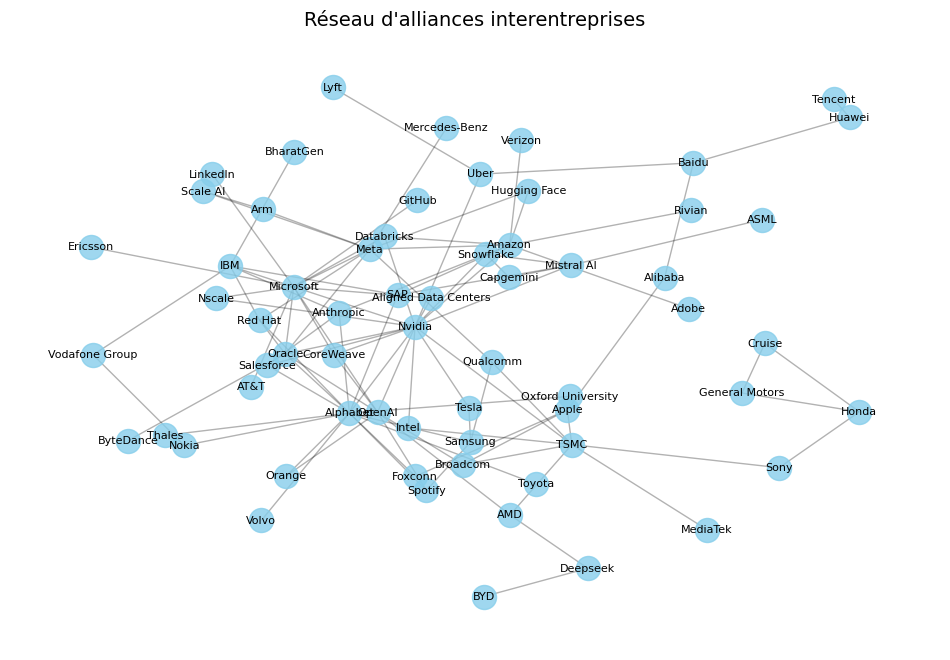

In [14]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.4, seed=42)  # positionnement esthétique
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Réseau d'alliances interentreprises", fontsize=14)
plt.axis('off')
plt.show()

In [15]:
# Créer un réseau interactif
net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="black")

# Charger les données du graphe NetworkX
net.from_nx(G)


net.force_atlas_2based()  # disposition plus harmonieuse
net.show_buttons(filter_=['physics'])  # pour ajuster l'espacement dans le navigateur
net.write_html("reseau_alliances.html")

### Graphe orienté

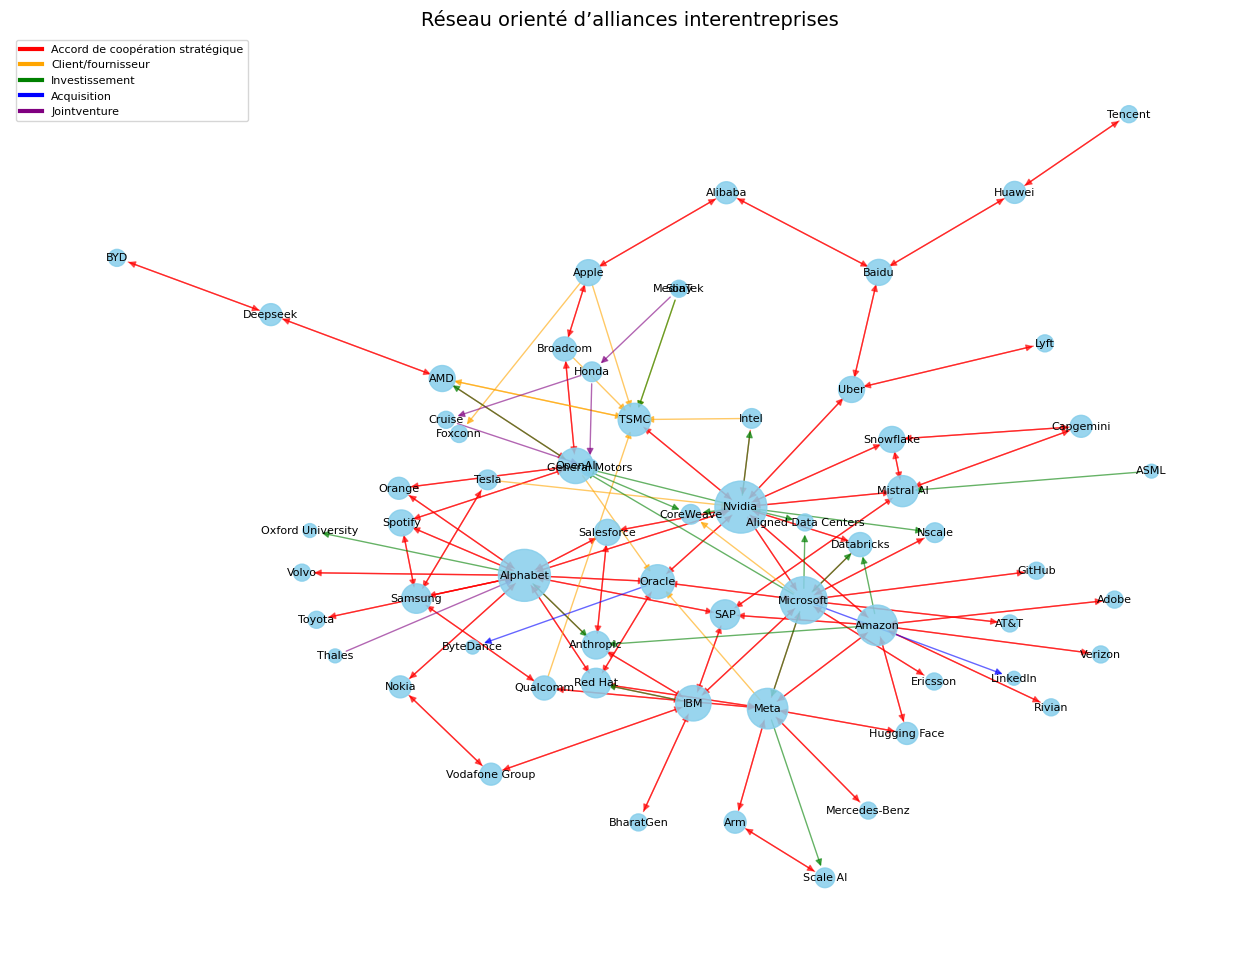

Nombre d’entreprises : 63 | Nombre d’alliances : 173


In [17]:
# Création du graphe orienté
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Accord de coopération stratégique": "red",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]

    if type_alliance == "Accord de coopération stratégique":
        # lien symétrique : les deux directions
        G.add_edge(a, b, type=type_alliance)
        G.add_edge(b, a, type=type_alliance)
    else:
        # lien orienté (A -> B)
        G.add_edge(a, b, type=type_alliance)

# Positionnement des nœuds
pos = nx.kamada_kawai_layout(G, scale=3)

# Taille des nœuds selon le degré
deg = dict(G.degree())
node_sizes = [deg[n]*50 + 50 for n in G.nodes()]

# Nœuds
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Dessiner les arêtes selon leur type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Ajouter les labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende manuelle
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


### Graphe des Investissements interentreprises

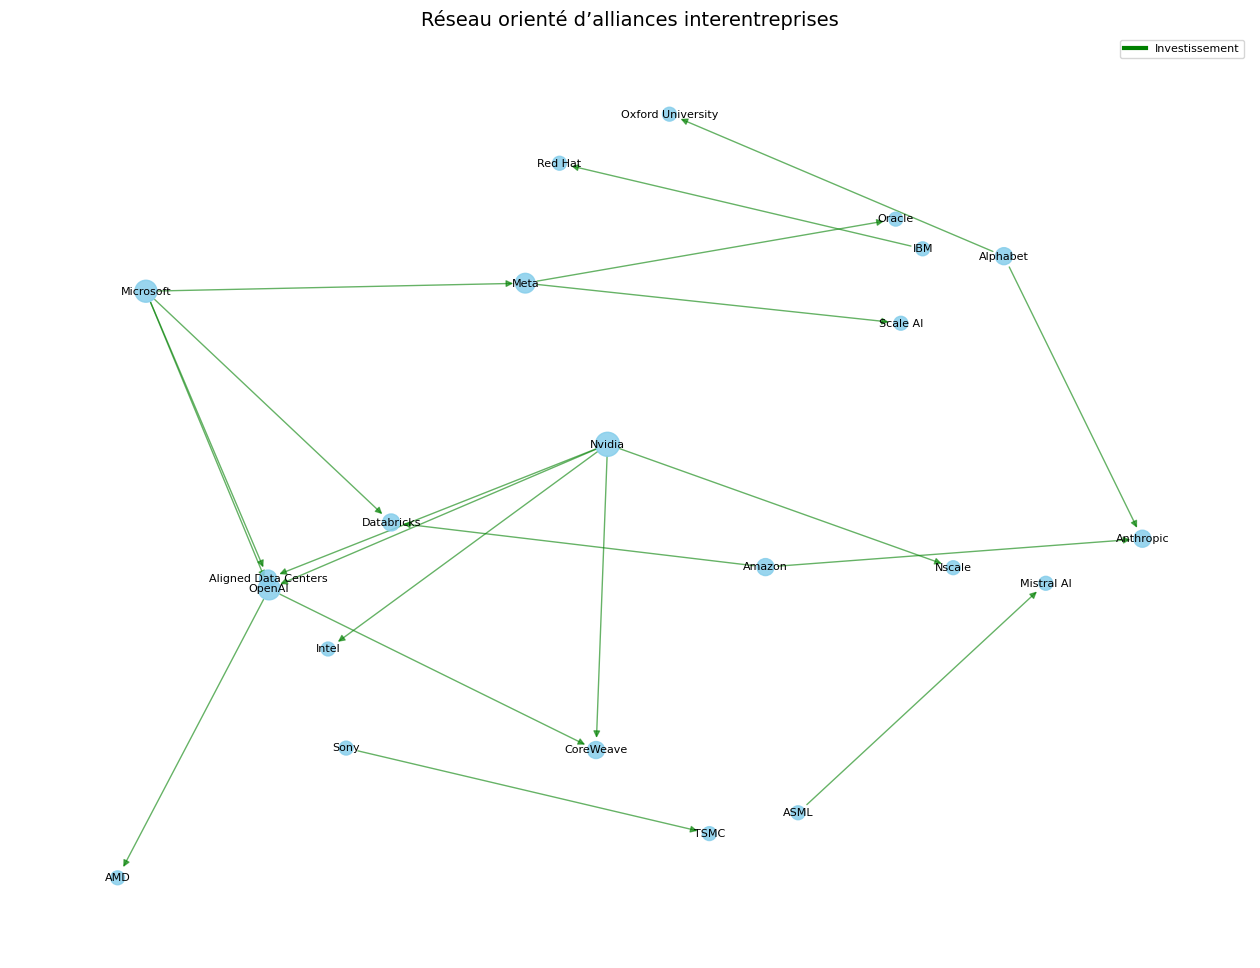

Nombre d’entreprises : 63 | Nombre d’alliances : 173


In [19]:
# --- Création du graphe orienté ---
I = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Investissement": "green",
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Investissement":
        I.add_edge(a, b, type=type_alliance)
    
# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(I, scale=3)

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(I.degree())
# nœud minimum 100, maximum proportionnel au degré
node_sizes = [50 + deg[n]*50 for n in I.nodes()] # ce serait bien de mettre les noeuds à la taille de la capitalisation boursière de l'entreprise

# --- Dessin ---
plt.figure(figsize=(16, 12))

# Nœuds
nx.draw_networkx_nodes(I, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Arêtes par type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in I.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(I, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(I, pos, font_size=8)

# Légende
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


### Calcul des mesures globales : (CENTRALISATION)

In [21]:
# Mesures rapides + viz
G_ud = G.to_undirected()
density = nx.density(G_ud)
components = nx.number_connected_components(G_ud)
giant = G_ud.subgraph(max(nx.connected_components(G_ud), key=len)).copy() if G_ud.number_of_nodes() else G_ud
avg_path = nx.average_shortest_path_length(giant) if (giant.number_of_nodes()>1 and nx.is_connected(giant)) else np.nan
print(f"🌐 Densité={density:.4f} | Composantes={components} | Dist. moyenne={(avg_path if not np.isnan(avg_path) else 'N/A')}")

deg = dict(G.degree())
btw = nx.betweenness_centrality(G_ud, normalized=True)
clo = nx.closeness_centrality(G_ud)
df_meas = pd.DataFrame({
    "Company": list(G.nodes()),
    "Degree": [deg[n] for n in G.nodes()],
    "Betweenness": [btw.get(n,0) for n in G.nodes()],
    "Closeness": [clo.get(n,0) for n in G.nodes()]
}).sort_values(["Degree","Betweenness"], ascending=[False,False])

print("🏆 Top 10 par degré:")
print(df_meas.head(10))

# --- Mesures globales ---
# Rappel : pour un graphe orienté, on calcule les mesures de "connectivité" sur la version non orientée
G_ud = G.to_undirected()

# composantes faibles (non orienté)
components = list(nx.connected_components(G_ud)) if G_ud.number_of_nodes() else []
num_components = len(components)
giant = G_ud.subgraph(max(components, key=len)).copy() if components else G_ud

# densité
density = nx.density(G_ud)

# distance moyenne (sur la composante géante uniquement)
if giant.number_of_nodes() > 1 and nx.is_connected(giant):
    avg_path = nx.average_shortest_path_length(giant)
else:
    avg_path = np.nan

# diamètre (sur la composante géante ; défini seulement si connectée et >1 nœud)
try:
    diameter = nx.diameter(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    diameter = np.nan

# rayon du réseau (sur la composante géante)
try:
    radius = nx.radius(giant) if giant.number_of_nodes() > 1 and nx.is_connected(giant) else np.nan
except nx.NetworkXError:
    radius = np.nan

# clustering global (transitivity) sur non orienté
transitivity = nx.transitivity(G_ud) if G_ud.number_of_nodes() > 0 else np.nan

# mesures de forte connexité (composantes fortement connexes pour le graphe orienté)
num_strong_cc = nx.number_strongly_connected_components(G) if G.number_of_nodes() > 0 else 0

print(f"""
🌐 Mesures globales
- Densité (non orienté)              : {density:.4f}
- Composantes faibles (non orienté)  : {num_components}
- Composantes fortement connexes (→) : {num_strong_cc}
- Distance moyenne (giant)           : {avg_path if not np.isnan(avg_path) else 'N/A'}
- Diamètre (giant)                   : {diameter if not np.isnan(diameter) else 'N/A'}
- Rayon (giant)                      : {radius if not np.isnan(radius) else 'N/A'}
- Transitivité (clustering global)   : {transitivity:.4f}
""".strip())


🌐 Densité=0.0522 | Composantes=1 | Dist. moyenne=3.327188940092166
🏆 Top 10 par degré:
       Company  Degree  Betweenness  Closeness
4       Nvidia      27     0.470535   0.496000
12    Alphabet      27     0.242542   0.418919
22   Microsoft      22     0.199258   0.424658
3       Amazon      16     0.135541   0.387500
36        Meta      16     0.127951   0.373494
30      OpenAI      12     0.099884   0.400000
27         IBM      12     0.062971   0.344444
31      Oracle      11     0.076899   0.421769
10        TSMC      10     0.221283   0.400000
60  Mistral AI       9     0.055003   0.352273
🌐 Mesures globales
- Densité (non orienté)              : 0.0522
- Composantes faibles (non orienté)  : 1
- Composantes fortement connexes (→) : 14
- Distance moyenne (giant)           : 3.327188940092166
- Diamètre (giant)                   : 8
- Rayon (giant)                      : 4
- Transitivité (clustering global)   : 0.1344


In [22]:
def _centralization_sum(scores: dict) -> float:
    """Somme de Freeman: sum(max(score) - score_i)."""
    if not scores:
        return np.nan
    vals = np.fromiter(scores.values(), float)
    return float((vals.max() - vals).sum())

def network_centralization(H, centrality_fn, *, giant_only=False, undirected=True, **kwargs):
    """
    Centralisation normalisée (Freeman):
    numérateur = ∑(max - score_i) sur le graphe H (ou sa composante géante),
    dénominateur = même somme sur une étoile de même taille.
    """
    # 1) Projection/choix du sous-graphe
    Gx = H.to_undirected() if undirected and H.is_directed() else H.copy()
    if giant_only:
        comps = (nx.connected_components(Gx) if not Gx.is_directed()
                 else nx.weakly_connected_components(Gx))
        comps = list(comps)
        if comps:
            Gx = Gx.subgraph(max(comps, key=len)).copy()

    n = Gx.number_of_nodes()
    if n <= 1:
        return np.nan

    # 2) Scores sur le graphe réel
    scores = centrality_fn(Gx, **kwargs)
    num = _centralization_sum(scores)

    # 3) Graphe "étoile" de référence et scores max théoriques
    #    - non orienté pour les mesures classiques (degré, betweenness, closeness, eigenvector)
    S = nx.star_graph(n - 1)  # nœud 0 = centre, n-1 rayons
    denom = _centralization_sum(centrality_fn(S, **kwargs))

    return num / denom if denom > 0 else np.nan

# On calcule sur la version non orientée (classique), en option seulement la composante géante
CG_deg   = network_centralization(G_ud, nx.degree_centrality,      giant_only=False, undirected=True)
CG_betw  = network_centralization(G_ud, nx.betweenness_centrality, giant_only=False, undirected=True, normalized=True)
CG_close = network_centralization(G_ud, nx.closeness_centrality,   giant_only=True,  undirected=True, wf_improved=True)
CG_eig   = network_centralization(G_ud, nx.eigenvector_centrality_numpy, giant_only=False, undirected=True)

print(f"🔧 Centralisation (0=dispersion, 1≈étoile):")
print(f"- Degré            : {CG_deg:.4f}"   if CG_deg==CG_deg else "- Degré            : N/A")
print(f"- Intermédiarité   : {CG_betw:.4f}"  if CG_betw==CG_betw else "- Intermédiarité   : N/A")
print(f"- Proximité (giant): {CG_close:.4f}" if CG_close==CG_close else "- Proximité (giant): N/A")
print(f"- Eigenvector      : {CG_eig:.4f}"   if CG_eig==CG_eig else "- Eigenvector      : N/A")


🔧 Centralisation (0=dispersion, 1≈étoile):
- Degré            : 0.2126
- Intermédiarité   : 0.4394
- Proximité (giant): 0.3750
- Eigenvector      : 0.5972


### Intégration des attributs des entreprises au réseau :

In [24]:
IN_CSV  = "../Base_de_donnees/companies_raw.csv"
OUT_CSV = "../Base_de_donnees/companies_clean.csv"

# 1) Lecture ROBUSTE (enlève BOM) (j'ai galéré)
if not os.path.exists(IN_CSV):
    raise FileNotFoundError(f"Fichier introuvable: {IN_CSV}")

# essaye utf-8-sig (retire BOM) sinon normal utf-8
try:
    raw = pd.read_csv(IN_CSV, sep=None, engine="python", dtype=str, encoding="utf-8-sig")
except Exception:
    raw = pd.read_csv(IN_CSV, sep=None, engine="python", dtype=str, encoding="utf-8")

# drop colonnes "Unnamed"
raw = raw.loc[:, ~raw.columns.str.contains(r"^Unnamed:", na=False)]
raw = raw.fillna("").replace(r"^\s+$", "", regex=True)

print(">> Colonnes brutes lues:", list(raw.columns))
print(">> Nbr lignes brutes:", len(raw))

# 2) Normalisation des en-têtes (enlève BOM, espaces, insécables, met en minuscules)
def clean_header(c: str) -> str:
    if not isinstance(c, str): return c
    c = c.lstrip("\ufeff")             # enlève BOM
    c = c.replace("\u00a0", " ")       # enlève espaces insécables
    c = re.sub(r"\s+", " ", c)         # condense espaces
    c = c.strip().lower()
    return c

raw.columns = [clean_header(c) for c in raw.columns]

# 3) Renommage -> noms attendus
rename_map = {
    "entreprises":"entreprises", "entreprise":"entreprises", "nom":"entreprises",
    "isin":"isin",
    "ca":"ca", "chiffre d'affaires":"ca", "chiffre d’affaires":"ca",
    "budget r&d":"budget r&d", "r&d":"budget r&d", "budget_r&d":"budget r&d",
    "taille entreprise":"taille entreprise", "taille":"taille entreprise",
    "secteur activité premier":"secteur activité premier", "secteur":"secteur activité premier",
    "actionnaire majoritaire":"actionnaire majoritaire", "actionnaire":"actionnaire majoritaire",
    "oui":"oui", "non":"non",
}
for k,v in list(rename_map.items()):
    if k in raw.columns and v not in raw.columns:
        raw = raw.rename(columns={k:v})

# 4) Colonnes minimales
need = ["entreprises","isin","ca","budget r&d","taille entreprise","secteur activité premier","actionnaire majoritaire","oui","non"]
for c in need:
    if c not in raw.columns:
        raw[c] = ""

# 5) Helpers parsing
def norm(s: str) -> str:
    return s.replace("\u202f"," ").replace("\xa0"," ").strip() if isinstance(s,str) else ""

def parse_money_any(s: str):
    """
    Extrait (valeur, devise, multiplicateur) depuis une chaîne "4 Md$ 2025" -> (4, "USD", 1e9).
    Gère unités FR/EN: Md$, Mds$, milliard(s), M$, million(s), B$, Tn, K.
    Évite de confondre une année (2025) avec la valeur.
    """
    if not isinstance(s, str):
        return (np.nan, "", np.nan)

    text = norm(s)
    if text == "":
        return (np.nan, "", np.nan)

    # Devise simple (étends si besoin)
    if re.search(r"\bKRW\b", text, re.I):
        currency = "KRW"
    elif re.search(r"(USD|US\$|\$)", text, re.I):
        currency = "USD"
    else:
        currency = "USD"

    # Unités possibles
    unit_map = {
        "tn": 1e12, "t": 1e12,
        "b$": 1e9, "b": 1e9,
        "md$": 1e9, "mds$": 1e9, "md": 1e9, "mds": 1e9,
        "mrd": 1e9, "mrds": 1e9,
        "milliard": 1e9, "milliards": 1e9,
        "m$": 1e6, "m": 1e6,
        "million": 1e6, "millions": 1e6,
        "k$": 1e3, "k": 1e3,
    }
    unit_alt = r"(?:Tn|T|B\$?|Md\$?|Mds\$?|Mrd|Mrds|Milliards?|Millions?|M\$?|K\$?|K)"

    # Nombre avec séparateurs FR/EN
    num_pat = r"(?:\d{1,3}(?:[ \u202f.,]\d{3})+|\d+(?:[.,]\d+)?)"

    pattern = rf"(?P<num>{num_pat})\s*(?P<unit>{unit_alt})?"
    matches = list(re.finditer(pattern, text, flags=re.I))

    def is_year(numstr: str) -> bool:
        n = re.sub(r"[^\d]", "", numstr)
        return len(n) == 4 and 1900 <= int(n) <= 2099

    def parse_num(numstr: str) -> float:
        # normalise: espace/nbsp -> rien ; virgule -> point ; si plusieurs points, on garde le dernier comme décimal
        s = numstr.replace("\u202f", " ").replace(" ", "").replace(",", ".")
        if s.count(".") > 1:
            parts = s.split(".")
            s = "".join(parts[:-1]) + "." + parts[-1]
        try:
            return float(s)
        except Exception:
            return np.nan

    chosen = None
    # 1) priorité aux nombres suivis d'une unité
    for m in matches:
        u = (m.group("unit") or "").lower().replace(" ", "")
        if u:
            chosen = (m.group("num"), u)
            break
    # 2) sinon, premier nombre qui n'est pas une année
    if chosen is None:
        for m in matches:
            nstr = m.group("num")
            if not is_year(nstr):
                chosen = (nstr, "")
                break

    if chosen is None:
        return (np.nan, currency, np.nan)

    nstr, u = chosen
    val = parse_num(nstr)
    mult = unit_map.get(u, 1.0)
    return (val, currency, float(mult))


def parse_employees(s: str):
    if not isinstance(s, str): return np.nan
    m = re.search(r"(\d[\d\s]*)", s)
    return float(m.group(1).replace(" ","")) if m else np.nan

# 6) Build clean
rows = []
for _, r in raw.iterrows():
    comp = norm(r.get("entreprises",""))
    if comp == "":
        continue
    rv, rcur, ru = parse_money_any(r.get("ca",""))
    rdv, rdc, rdu = parse_money_any(r.get("budget r&d",""))
    emp = parse_employees(r.get("taille entreprise",""))
    act = r.get("secteur activité premier","")
    oui = str(r.get("oui","")).strip().lower() in ["true","vrai","oui","1","x"]
    non = str(r.get("non","")).strip().lower() in ["true","vrai","oui","1","x"]
    rec = {
        "Company": comp,
        "ISIN": norm(r.get("isin","")),
        "MarketValueUSD": np.nan,
        "RevenueUSD": rv*ru if (rcur=="USD" and pd.notna(rv)) else np.nan,
        "Revenue_Value": rv, "Revenue_Currency": rcur, "Revenue_UnitMultiplier": ru,
        "RDBudgetUSD": rdv*rdu if (rdc=="USD" and pd.notna(rdv)) else np.nan,
        "RDBudget_Value": rdv, "RDBudget_Currency": rdc, "RDBudget_UnitMultiplier": rdu,
        "Employees": emp,
        "Activity": act,
        "Region": "",
        "MajorShareholders": norm(r.get("actionnaire majoritaire","")),
        "Flag_OUI": oui, "Flag_NON": non
    }
    rows.append(rec)

clean = pd.DataFrame(rows, columns=[
    "Company","ISIN","MarketValueUSD",
    "RevenueUSD","Revenue_Value","Revenue_Currency","Revenue_UnitMultiplier",
    "RDBudgetUSD","RDBudget_Value","RDBudget_Currency","RDBudget_UnitMultiplier",
    "Employees","Activity","Region","MajorShareholders","Flag_OUI","Flag_NON"
])

# 7) Sauvegarde & vérifs
clean = clean.loc[~clean["Company"].eq("")]
clean.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f"✅ {OUT_CSV} écrit avec {len(clean)} lignes")
print(clean.head(8))


>> Colonnes brutes lues: ['Entreprises', 'ISIN', 'Pays', 'CA', 'Budget R&D', 'Taille entreprise', 'Secteur activité premier', 'Actionnaire majoritaire', 'OUI', 'NON']
>> Nbr lignes brutes: 74
✅ ../Base_de_donnees/companies_clean.csv écrit avec 74 lignes
                Company                                             ISIN  \
0                  Acer                                     TW0002353000   
1                 Adobe                                     US00724F1012   
2                Akamai                                     US00971T1016   
3               Alibaba                                     US01609W1027   
4  Aligned Data Centers                                     pas sur LSEG   
5              Alphabet  US02079K3059 (Class A) / US02079K1079 (Class C)   
6                Amazon                                     US0231351067   
7                   AMD                                     US0079031078   

   MarketValueUSD    RevenueUSD  Revenue_Value Revenue_Curren

### Graphe des actionnaires majoritaires
Vérifier si certaines alliances sont plus fréquentes entre entreprises partageant un même actionnaire majoritaire
→ indicateur d’influence / de cohésion du capital sur la structure du réseau.

In [26]:
# --- 0) Fonction de normalisation unique (pour tout) ---
def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip()
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)  # retire "(A)", "(B)", "(Class C)" final
    s = s.replace("\u00a0"," ")
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s
    
#TEST
# --- 1) DIAGNOSTIC : Oracle dans deal & dans G ---
def debug_company_presence(company="Oracle"):
    key = canon(company)
    # 1a) variantes dans deal
    A_vals = deal["Entreprise A"].astype(str)
    B_vals = deal["Entreprise B"].astype(str)
    maskA = A_vals.str.lower().str.contains("oracle", na=False)
    maskB = B_vals.str.lower().str.contains("oracle", na=False)
    print("🔎 Lignes contenant 'Oracle' (A ou B) dans deal:", int(maskA.sum()+maskB.sum()))
    if maskA.any() or maskB.any():
        print(deal.loc[maskA | maskB, ["Entreprise A","Entreprise B","Type d'alliance"]].head(10))

    # 1b) Oracle dans les nœuds du graphe (avant correction)
    nodes_now = list(G.nodes()) if isinstance(G, nx.Graph) else []
    in_graph = any(canon(n)==key for n in nodes_now)
    print("🧩 Oracle présent dans G (avant correction) ?", in_graph)

print("=== DIAGNOSTIC ORACLE ===")
debug_company_presence("Oracle")

# --- 2) RECONSTRUCTION du graphe avec normalisation cohérente ---
def oriented(t: str) -> bool:
    t = (t or "").lower()
    return any(k in t for k in ["acquisition","client","fournisseur","transfert"])

# 2a) ensemble des nœuds à partir des arêtes
nodes_from_edges = set()
for _, r in deal.iterrows():
    a = canon(str(r["Entreprise A"]))
    b = canon(str(r["Entreprise B"]))
    if a: nodes_from_edges.add(a)
    if b: nodes_from_edges.add(b)

# 2b) ensemble des nœuds à partir du CSV entreprises (pour ne pas en perdre)
try:
    companies = pd.read_csv("companies_clean.csv", dtype=str).fillna("")
    companies["canon_key"] = companies["Company"].map(canon)
    nodes_from_companies = set(companies["canon_key"].tolist())
except FileNotFoundError:
    companies = pd.DataFrame(columns=["Company"])
    nodes_from_companies = set()

# 2c) union (on conserve même les isolés)
all_nodes_canon = nodes_from_edges | nodes_from_companies

# 2d) mapping canon -> étiquette d’affichage (on privilégie l’orthographe du CSV s’il existe)
label_by_canon = {k:k.title() for k in all_nodes_canon}
if not companies.empty:
    for _, r in companies.iterrows():
        key = r["canon_key"]
        if key: label_by_canon[key] = r["Company"].strip() or label_by_canon.get(key, key.title())

# 2e) construire G
G = nx.DiGraph()
# ajoute tous les nœuds dès le départ
for k in all_nodes_canon:
    G.add_node(label_by_canon[k])

# ajoute les arêtes (avec attributs) en re-projetant canon -> label affiché
added = 0
for _, r in deal.iterrows():
    a_key = canon(str(r["Entreprise A"]))
    b_key = canon(str(r["Entreprise B"]))
    if not a_key or not b_key: 
        continue
    a = label_by_canon[a_key]
    b = label_by_canon[b_key]
    t = r.get("Type d'alliance","")
    attrs = {
        "Type_alliance": t,
        "Date": r.get("Date",""),
        "Concurrence": r.get("Concurrence",""),
        "Explanation": r.get("Explication alliance",""),
        "SourceURL": r.get("Source",""),
        "Comment": r.get("commentaire","") if "commentaire" in r else ""
    }
    if oriented(t):
        G.add_edge(a, b, **attrs); added += 1
    else:
        G.add_edge(a, b, **attrs); G.add_edge(b, a, **attrs); added += 2

print(f"✅ Graphe reconstruit (canonisé): {G.number_of_nodes()} nœuds | {G.number_of_edges()} liens (ajoutés: {added})")

# --- 3) Attacher les attributs (actionnaires, etc.) par clé canonique ---
attached = 0
if not companies.empty:
    # (A) on écarte les lignes sans clé (sinon elles font la clé vide "")
    companies = companies[companies["canon_key"].astype(str).str.strip() != ""].copy()

    # (B) agrégation "première valeur non vide" pour éviter les doublons
    def first_nonempty(s: pd.Series):
        for v in s:
            if isinstance(v, str):
                if v.strip():
                    return v
            elif pd.notna(v):
                return v
        return "" if s.dtype == "object" else np.nan

    agg_map = {col: first_nonempty for col in companies.columns if col != "canon_key"}
    companies_unique = (
        companies.groupby("canon_key", as_index=False, sort=False)
                 .agg(agg_map)
    )

    # (C) dictionnaire propre
    info_by_key = companies_unique.set_index("canon_key").to_dict(orient="index")

    # (D) attacher les attributs à G
    for n in G.nodes():
        k = canon(n)
        if k in info_by_key:
            G.nodes[n].update(info_by_key[k])
            attached += 1

print(f"🎯 Attributs attachés: {attached} / {G.number_of_nodes()}")

G.remove_nodes_from(list(nx.isolates(G)))

# --- 4) Vérifier Oracle maintenant ---
print("=== POST-CORRECTION ORACLE ===")
print("Oracle présent dans G ?", any(canon(n) == canon("Oracle") for n in G.nodes()))

# --- 5) Mesures globales + diamètre (sur la composante géante non orientée) ---
G_ud = G.to_undirected()
components = list(nx.connected_components(G_ud)) if G_ud.number_of_nodes() else []
num_components = len(components)
giant = G_ud.subgraph(max(components, key=len)).copy() if components else G_ud

density = nx.density(G_ud)
if giant.number_of_nodes() > 1 and nx.is_connected(giant):
    avg_path = nx.average_shortest_path_length(giant)
    diameter = nx.diameter(giant)
else:
    avg_path = np.nan
    diameter = np.nan

print(f"🌐 Densité={density:.4f} | Composantes={num_components} | Dist. moyenne={(avg_path if not np.isnan(avg_path) else 'N/A')} | Diamètre={(diameter if not np.isnan(diameter) else 'N/A')}")


=== DIAGNOSTIC ORACLE ===
🔎 Lignes contenant 'Oracle' (A ou B) dans deal: 8
    Entreprise A Entreprise B                    Type d'alliance
41        OpenAI       Oracle                 Client/fournisseur
79        Oracle       Nvidia  Accord de coopération stratégique
80        Oracle    Microsoft  Accord de coopération stratégique
81        Oracle     Alphabet  Accord de coopération stratégique
82        Oracle    ByteDance                        Acquisition
107      Red Hat       Oracle  Accord de coopération stratégique
109         Meta       Oracle                     Investissement
110         Meta       Oracle                 Client/fournisseur
🧩 Oracle présent dans G (avant correction) ? True
✅ Graphe reconstruit (canonisé): 63 nœuds | 192 liens (ajoutés: 215)
🎯 Attributs attachés: 0 / 63
=== POST-CORRECTION ORACLE ===
Oracle présent dans G ? True
🌐 Densité=0.0522 | Composantes=1 | Dist. moyenne=3.327188940092166 | Diamètre=8


In [27]:
# Lecture du fichier clean (celui avec les actionnaires)
nodes = pd.read_csv("../Base_de_donnees/companies_clean.csv", dtype=str).fillna("")
nodes.columns = [c.strip() for c in nodes.columns]

# Création d'un dict {entreprise: actionnaire}
owners = nodes.set_index("Company")["MajorShareholders"].to_dict()

# Ajouter l'attribut "MajorShareholder" dans le graphe (même vide)
for n in G.nodes():
    G.nodes[n]["MajorShareholder"] = owners.get(n, "").strip()

# Vérification rapide
pd.Series([G.nodes[n]["MajorShareholder"] for n in G.nodes()]).value_counts().head(10)


                                 22
Vanguard                         15
Amazon                            2
Primecap Management Company       2
Pas de data                       1
Toyota Industries                 1
Emirates Investment Authority     1
Lorentzon                         1
French Government                 1
Elon Musk                         1
Name: count, dtype: int64

In [28]:
same_shareholder_edges = 0
for u, v in G.edges():
    if G.nodes[u].get("MajorShareholder","") != "" and G.nodes[u].get("MajorShareholder","") == G.nodes[v].get("MajorShareholder",""):
        same_shareholder_edges += 1

ratio = same_shareholder_edges / G.number_of_edges() if G.number_of_edges() > 0 else 0
print(f"🤝 Alliances reliant des entreprises au même actionnaire : {same_shareholder_edges} ({ratio:.1%} du total)")


🤝 Alliances reliant des entreprises au même actionnaire : 24 (12.5% du total)


In [29]:
edges_by_shareholder = collections.Counter()
for u, v in G.edges():
    sh_u = G.nodes[u].get("MajorShareholder","")
    sh_v = G.nodes[v].get("MajorShareholder","")
    if sh_u != "" and sh_v != "":
        if sh_u == sh_v:
            edges_by_shareholder[sh_u] += 1

print("🏦 Top 10 actionnaires par nombre d’alliances internes au groupe :")
for sh, n in edges_by_shareholder.most_common(10):
    print(f"{sh:<30} {n} alliances intra-groupe")


🏦 Top 10 actionnaires par nombre d’alliances internes au groupe :
Vanguard                       22 alliances intra-groupe
Primecap Management Company    2 alliances intra-groupe


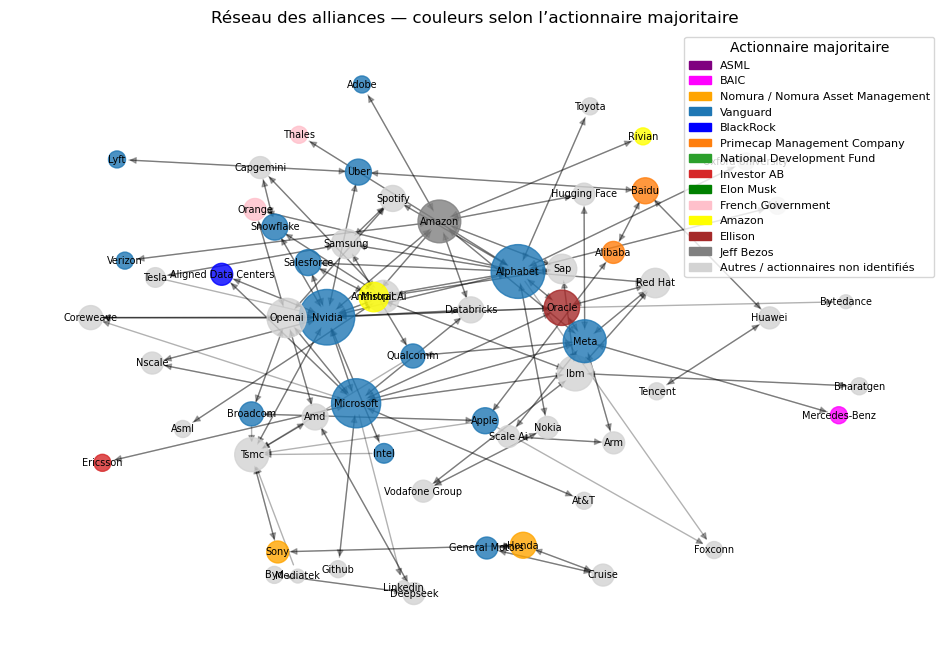

In [49]:
import matplotlib.patches as mpatches

G.remove_nodes_from(list(nx.isolates(G)))
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.6, seed=42)

colors = []
for n in G.nodes():
    sh = G.nodes[n].get("MajorShareholder","")
    if sh in ["Amazon","ASML","Nomura","Nomura Asset Management","BAIC","Vanguard","BlackRock", "BlackRock ","Jeff Bezos","French Government","Primecap Management Company","National Developement Fund","Investor AB","Elon Musk ","French Governement", "Ellison"]:
        colors.append({
            "ASML": "purple",
            "ASML ": "purple",
            "BAIC":"magenta",
            "Nomura Asset Management":"orange",
            "Nomura":"orange",
            "Vanguard":"#1f77b4",
            "BlackRock" : "blue",
            "BlackRock " : "blue",
            "Primecap Management Company":"#ff7f0e",
            "National Developement Fund":"#2ca02c",
            "Investor AB":"#d62728",
            "Elon Musk" : "green",
            "French Government": "pink",
            "French Governement" : "pink",
            "Amazon" : "yellow",
            "Ellison" : "brown",
            "Jeff Bezos" : "grey"
        }.get(sh, "gray"))
    else:
        colors.append("lightgray")

deg = dict(G.degree())       
node_sizes = [50 + deg[n]*50 for n in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=7)

# === LÉGENDE ===
legend_dict = {
    "purple": "ASML",
    "magenta": "BAIC",
    "orange": "Nomura / Nomura Asset Management",
    "#1f77b4": "Vanguard",
    "blue": "BlackRock",
    "#ff7f0e": "Primecap Management Company",
    "#2ca02c": "National Development Fund",
    "#d62728": "Investor AB",
    "green": "Elon Musk",
    "pink": "French Government",
    "yellow": "Amazon",
    "brown": "Ellison",
    "grey": "Jeff Bezos",
    "lightgray": "Autres / actionnaires non identifiés"
}

patches = [mpatches.Patch(color=color, label=label) for color, label in legend_dict.items()]
plt.legend(handles=patches, title="Actionnaire majoritaire", loc="best", fontsize=8)

plt.title("Réseau des alliances — couleurs selon l’actionnaire majoritaire")
plt.axis("off")

plt.savefig("../images/reseau_actionnaires.png", dpi=300, bbox_inches="tight")
plt.show()



In [31]:
def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)  # retire les (A), (B), etc.
    s = s.replace("\u00a0"," ").strip().lower()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"[^a-z0-9]+", "", s)
    return s

nodes_csv = pd.read_csv("../Base_de_donnees/companies_clean.csv", dtype=str).fillna("")
nodes_csv["canon_key"] = nodes_csv["Company"].map(canon)

canon_csv = set(nodes_csv["canon_key"])
canon_g = {canon(n) for n in G.nodes()}

not_found = sorted([n for n in G.nodes() if canon(n) not in canon_csv])

print(f"🔎 Entreprises dans le graphe : {len(G.nodes())}")
print(f"🗃 Entreprises dans le CSV : {len(nodes_csv)}")
print(f"⚠️ Nœuds du graphe sans correspondance dans le CSV : {len(not_found)}")
print("Exemples de nœuds non reconnus :", not_found[:20])


🔎 Entreprises dans le graphe : 63
🗃 Entreprises dans le CSV : 74
⚠️ Nœuds du graphe sans correspondance dans le CSV : 1
Exemples de nœuds non reconnus : ['Oxford University']


### Graphe Market Value, R&D, employés

In [35]:
def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip()
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)  # retire suffixes "(A)", "(Class C)"…
    s = s.replace("\u00a0"," ")
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def to_float(x):
    """Robuste: gère espaces fines, virgules, symboles, etc."""
    if x is None or (isinstance(x, float) and np.isnan(x)): return np.nan
    s = str(x).strip().replace("\u00a0"," ")
    if not s or s.lower() in {"na","n/a","none","nan"}: return np.nan
    s = s.replace("$","").replace("€","").replace(" ", "").replace(",", "")
    m = re.search(r"[-+]?\d*\.?\d+(e[-+]?\d+)?", s, flags=re.I)
    return float(m.group(0)) if m else np.nan

def build_topk_subgraph(G, values_by_node: dict, k=50, min_value=None):
    """values_by_node: dict {label_du_noeud_dans_G: valeur_numérique}"""
    s = pd.Series(values_by_node, dtype=float).replace([np.inf,-np.inf], np.nan).dropna()
    if s.empty:
        raise ValueError("Aucune valeur numérique valide pour la sélection.")
    s = s.sort_values(ascending=False)
    keep = set(s.loc[s >= float(min_value)].index) if min_value is not None else set(s.head(int(k)).index)
    H = G.subgraph(keep).copy()
    return H, s

def metrics_undirected(H):
    """Mesures sur non orienté + composante géante pour cohérence."""
    Hud = H.to_undirected()
    comps = list(nx.connected_components(Hud)) if Hud.number_of_nodes() else []
    giant = Hud.subgraph(max(comps, key=len)).copy() if comps else Hud
    out = dict(n=H.number_of_nodes(), m=H.number_of_edges())
    out["density_full_ud"]  = nx.density(Hud)   if Hud.number_of_nodes()>1   else np.nan
    out["density_giant_ud"] = nx.density(giant) if giant.number_of_nodes()>1 else np.nan
    if giant.number_of_nodes()>1 and nx.is_connected(giant):
        out["avg_path"] = nx.average_shortest_path_length(giant)
        out["diameter"] = nx.diameter(giant)
        out["radius"]   = nx.radius(giant)
    else:
        out["avg_path"] = out["diameter"] = out["radius"] = np.nan
    out["transitivity_full_ud"] = nx.transitivity(Hud) if Hud.number_of_nodes()>0 else np.nan
    return out

# ---------- 1) Charger & dédoublonner le CSV ----------
df = pd.read_csv("../Base_de_donnees/companies_clean.csv", dtype=str).fillna("")
df["canon_key"] = df["Company"].map(canon)

# écarter les clés vides
df = df[df["canon_key"]!=""].copy()

# dédoublonnage: première valeur non vide par colonne
def first_nonempty(s: pd.Series):
    for v in s:
        if isinstance(v, str) and v.strip(): return v
        if not isinstance(v, str) and pd.notna(v): return v
    return "" if s.dtype=="object" else np.nan

agg_map = {c: first_nonempty for c in df.columns if c!="canon_key"}
dfu = df.groupby("canon_key", as_index=False, sort=False).agg(agg_map)

# ---------- 2) Préparer le mapping canon -> label réel des nœuds de G ----------
canon_to_label = {canon(n): n for n in G.nodes()}

# ---------- 3) Construire les dicts de valeurs ----------
mv_vals, rd_vals, emp_vals = {}, {}, {}

for _, r in dfu.iterrows():
    key = r["canon_key"]
    if key not in canon_to_label:
        continue
    node = canon_to_label[key]

    mv  = to_float(r.get("MarketValueUSD", ""))
    rd  = to_float(r.get("RDBudgetUSD", ""))
    emp = to_float(r.get("Employees", ""))

    if np.isfinite(mv):  mv_vals[node]  = mv
    if np.isfinite(rd):  rd_vals[node]  = rd
    if np.isfinite(emp): emp_vals[node] = emp

# ---------- 4) Paramètres de sélection ----------
TOP_K = 50            # Top-K par attribut (change si besoin)
# ALTERNATIVE: utilise un seuil absolu (met None si TOP_K)
MV_MIN = None         # ex: 1e11  -> >= 100 Md$
RD_MIN = None         # ex: 1e9   -> >= 1 Md$
EMP_MIN = None        # ex: 10000 -> >= 10k employés

# ---------- 5) Construire les 3 sous-graphes ----------
graphs, tables = {}, {}

if mv_vals:
    G_mv, s_mv = build_topk_subgraph(G, mv_vals, k=TOP_K, min_value=MV_MIN)
    graphs["market_value"] = G_mv; tables["market_value"] = s_mv
else:
    print("⚠️ Aucun MarketValueUSD exploitable.")

if rd_vals:
    G_rd, s_rd = build_topk_subgraph(G, rd_vals, k=TOP_K, min_value=RD_MIN)
    graphs["rd"] = G_rd; tables["rd"] = s_rd
else:
    print("⚠️ Aucun RDBudgetUSD exploitable.")

if emp_vals:
    G_emp, s_emp = build_topk_subgraph(G, emp_vals, k=TOP_K, min_value=EMP_MIN)
    graphs["employees"] = G_emp; tables["employees"] = s_emp
else:
    print("⚠️ Aucun Employees exploitable.")

# ---------- 6) Métriques ----------
for name, H in graphs.items():
    m = metrics_undirected(H)
    print(f"\n📊 Réseau '{name}' — n={m['n']}, m={m['m']}")
    print(f"- Densité (full non orienté) : {m['density_full_ud']:.4f}" if m['n']>1 else "- Densité : N/A")
    print(f"- Densité (giant)            : {m['density_giant_ud']:.4f}" if m['n']>1 else "- Densité (giant) : N/A")
    print(f"- Distance moyenne (giant)    : {m['avg_path'] if not np.isnan(m['avg_path']) else 'N/A'}")
    print(f"- Diamètre (giant)            : {m['diameter'] if not np.isnan(m['diameter']) else 'N/A'}")
    print(f"- Rayon (giant)               : {m['radius'] if not np.isnan(m['radius']) else 'N/A'}")
    print(f"- Transitivité (full)         : {m['transitivity_full_ud']:.4f}" if m['n']>0 else "- Transitivité : N/A")

# Accès:
# graphs["market_value"], graphs["rd"], graphs["employees"]
# tables[...] = Series triées avec les valeurs retenues


⚠️ Aucun MarketValueUSD exploitable.

📊 Réseau 'rd' — n=44, m=104
- Densité (full non orienté) : 0.0603
- Densité (giant)            : 0.0662
- Distance moyenne (giant)    : 3.2067363530778166
- Diamètre (giant)            : 8
- Rayon (giant)               : 4
- Transitivité (full)         : 0.1030

📊 Réseau 'employees' — n=50, m=130
- Densité (full non orienté) : 0.0547
- Densité (giant)            : 0.0638
- Distance moyenne (giant)    : 3.1729468599033814
- Diamètre (giant)            : 7
- Rayon (giant)               : 4
- Transitivité (full)         : 0.1204


RevenueUSD: 50 nœuds, 141 arêtes
R&D:         44 nœuds, 104 arêtes
Employés:    50 nœuds, 130 arêtes


C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\2637659869.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


🖼️ Export: ../images/graph_market_value.png


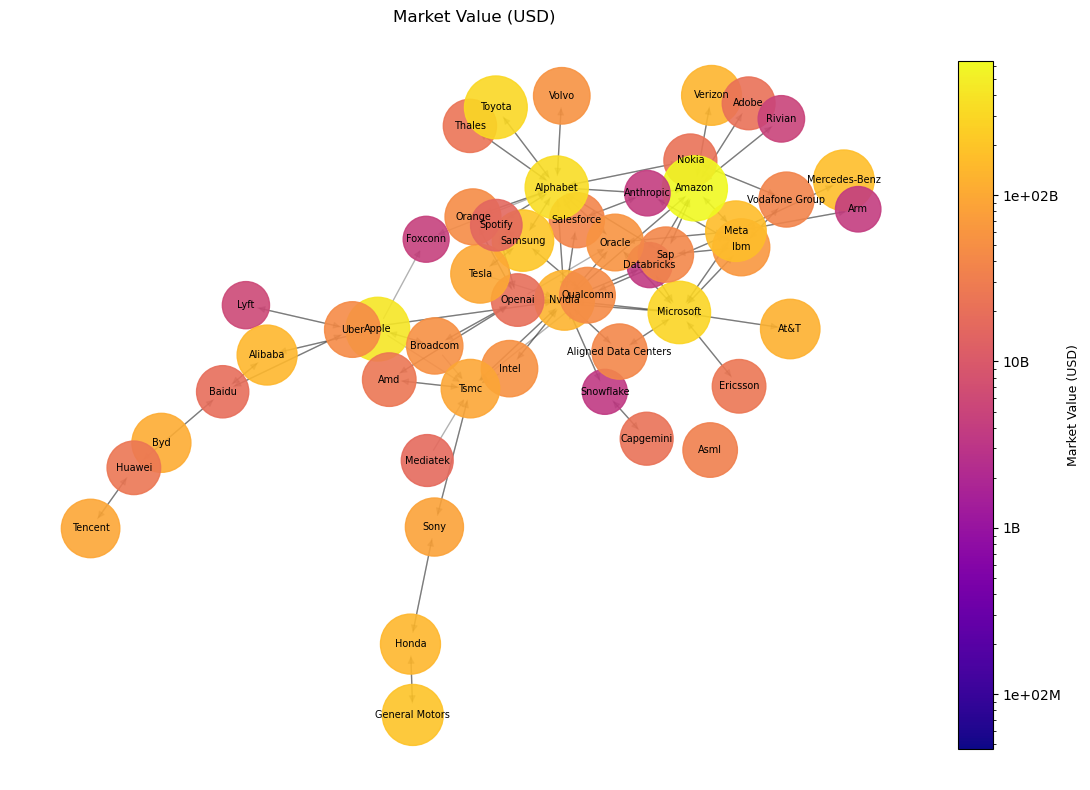

C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\2637659869.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


🖼️ Export: ../images/graph_rd.png


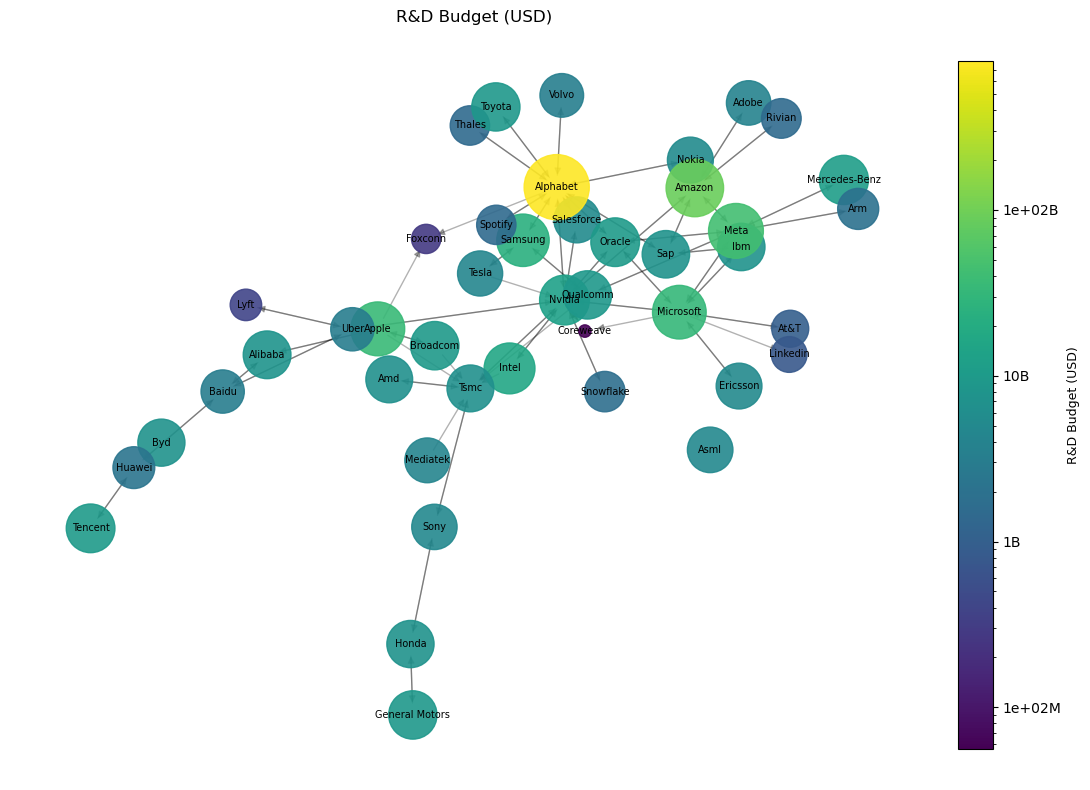

C:\Users\emaga\AppData\Local\Temp\ipykernel_19276\2637659869.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


🖼️ Export: ../images/graph_employees.png


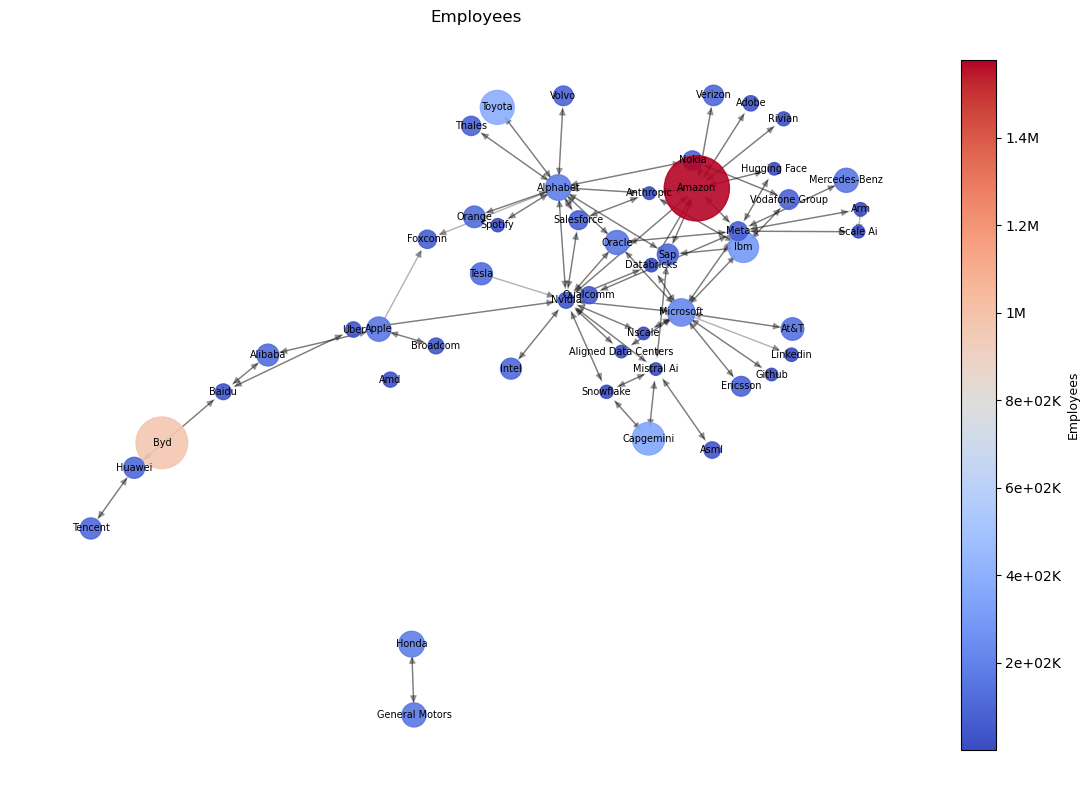

{'Hugging Face': array([0.38637594, 0.33101014]),
 'Apple': array([-0.33842863, -0.05973746]),
 'Asml': array([ 0.27261738, -0.35442026]),
 'Broadcom': array([-0.23363902, -0.10069467]),
 'Baidu': array([-0.62354988, -0.21238259]),
 'Amd': array([-0.31730104, -0.1828262 ]),
 'Mercedes-Benz': array([0.51837936, 0.30294349]),
 'Sony': array([-0.23428199, -0.54204423]),
 'Tencent': array([-0.8663205 , -0.54554575]),
 'Intel': array([-0.0962032 , -0.15605779]),
 'Cruise': array([-0.3374745, -0.9903178]),
 'Snowflake': array([ 0.07891418, -0.21255429]),
 'Red Hat': array([0.19326975, 0.22279895]),
 'Nscale': array([ 0.14681638, -0.07018045]),
 'Deepseek': array([-0.55320968, -0.29672035]),
 'Tsmc': array([-0.16808739, -0.20473086]),
 'Aligned Data Centers': array([ 0.10608648, -0.11444472]),
 'Mistral Ai': array([ 0.16921422, -0.15713162]),
 'Byd': array([-0.73616042, -0.33684131]),
 'Honda': array([-0.27832126, -0.82734716]),
 'Salesforce': array([0.02759193, 0.20574913]),
 'Lyft': array([

In [47]:
def canon(s: str) -> str:
    if not isinstance(s, str): return ""
    s = s.strip()
    s = re.sub(r"\s*\([^)]*\)\s*$", "", s)
    s = s.replace("\u00a0"," ")
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def to_float(x):
    if x is None or (isinstance(x, float) and np.isnan(x)): return np.nan
    s = str(x).strip().replace("\u00a0"," ")
    if not s or s.lower() in {"na","n/a","none","nan"}: return np.nan
    s = s.replace("$","").replace("€","")
    s = s.replace(" ", "").replace(",", "")
    m = re.search(r"[-+]?\d*\.?\d+(e[-+]?\d+)?", s, flags=re.I)
    return float(m.group(0)) if m else np.nan

def first_nonempty(s: pd.Series):
    for v in s:
        if isinstance(v, str) and v.strip(): return v
        if not isinstance(v, str) and pd.notna(v): return v
    return "" if s.dtype=="object" else np.nan

def build_values(G, df, col_name):
    """Retourne dict {node_label_in_G: value_num} pour la colonne donnée."""
    df["canon_key"] = df["Company"].map(canon)
    df = df[df["canon_key"]!=""].copy()
    agg_map = {c: first_nonempty for c in df.columns if c!="canon_key"}
    dfu = df.groupby("canon_key", as_index=False, sort=False).agg(agg_map)
    canon_to_label = {canon(n): n for n in G.nodes()}
    values = {}
    for _, r in dfu.iterrows():
        k = r["canon_key"]
        if k in canon_to_label:
            node = canon_to_label[k]
            v = to_float(r.get(col_name, ""))
            if np.isfinite(v):
                values[node] = v
    return values

def pick_top_nodes(values_by_node, k=None, min_value=None):
    s = pd.Series(values_by_node, dtype=float).replace([np.inf, -np.inf], np.nan).dropna()
    s = s.sort_values(ascending=False)
    if s.empty:
        # Toujours retourner 2 valeurs
        return set(), s
    if min_value is not None:
        keep = set(s.loc[s >= float(min_value)].index)
    elif k is not None:
        keep = set(s.head(int(k)).index)
    else:
        keep = set(s.index)
    return keep, s

def _fmt_kmbt(x, _pos=None):
    x = float(x)
    for unit, div in [("T",1e12),("B",1e9),("M",1e6),("K",1e3)]:
        if abs(x) >= div:
            return f"{x/div:.2g}{unit}"
    return f"{x:.0f}"

def draw_network(
    H, values_series, title,
    pos=None,
    label_mode="top", label_top=15, label_thresh=None,
    cmap_name="viridis",
    scale="log",              # "log" ou "linear"
    vmin=None, vmax=None,     # fixe une échelle commune entre graphes si souhaité
    out_png=None, out_gexf=None
):
    if H.number_of_nodes() == 0:
        print(f"⚠️ Réseau vide pour {title}")
        return pos

    if pos is None:
        n = H.number_of_nodes()
        pos = nx.spring_layout(
            H.to_undirected(),
            seed=42,
            k=100,   # valeur plus grande => plus d’espace
            iterations=200        # plus d’itérations pour stabiliser
        )


    # valeurs par nœud alignées
    vals = pd.Series({n: values_series.get(n, np.nan) for n in H.nodes()}, dtype="float")
    vals = vals.replace([np.inf, -np.inf], np.nan)
    vals_nonan = vals.dropna()
    if vals_nonan.empty:
        print(f"⚠️ Aucune valeur numérique pour {title}")
        vals_nonan = pd.Series(np.ones(len(H.nodes())), index=H.nodes())

    data_min = np.nanmin(vals_nonan.values)
    data_max = np.nanmax(vals_nonan.values)

    # Échelle couleur
    if scale == "log":
        eps = 1e-12  # pour éviter 0 en LogNorm
        vmin_eff = (vmin if vmin is not None else max(eps, data_min))
        vmax_eff = (vmax if vmax is not None else max(eps, data_max))
        norm = mcolors.LogNorm(vmin=vmin_eff, vmax=vmax_eff)
    else:
        vmin_eff = vmin if vmin is not None else data_min
        vmax_eff = vmax if vmax is not None else data_max
        norm = mcolors.Normalize(vmin=vmin_eff, vmax=vmax_eff)

    cmap = cm.get_cmap(cmap_name)

    # Couleurs (les NaN sont mappées au min)
    node_colors = [cmap(norm(vals.get(n, vmin_eff))) for n in H.nodes()]

    # Tailles (on suit la même logique d’échelle)
    def scale_sizes(series, min_size=80, max_size=2200):
        arr = series.values.astype(float)
        if scale == "log":
            arr = np.clip(arr, vmin_eff, None)          # pas en-dessous de vmin
            arr = np.log(arr)
            lo, hi = np.log(vmin_eff), np.log(vmax_eff)
        else:
            lo, hi = vmin_eff, vmax_eff
        if not np.isfinite(lo) or not np.isfinite(hi) or hi == lo:
            return [ (min_size+max_size)/2.0 ] * len(arr)
        return list(min_size + (arr - lo) * (max_size - min_size) / (hi - lo))

    node_sizes = scale_sizes(vals.fillna(vmin_eff))

    # Dessin
    fig, ax = plt.subplots(figsize=(11, 8))
    nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.3, ax=ax)
    nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9, ax=ax)

    # Colorbar avec valeurs réelles + format K/M/B/T
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
    cbar.set_label(title, fontsize=9)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(_fmt_kmbt))

    # Labels
    labels = {}
    if label_mode == "all":
        labels = {n: n for n in H.nodes()}
    elif label_mode == "top":
        tops = vals.sort_values(ascending=False).head(label_top).index
        labels = {n: n for n in tops}
    elif label_mode == "thresh" and label_thresh is not None:
        keep = vals[vals >= float(label_thresh)].index
        labels = {n: n for n in keep}
    if labels:
        nx.draw_networkx_labels(H, pos, labels=labels, font_size=7, font_color="black", ax=ax)

    ax.set_title(title, fontsize=12)
    ax.set_axis_off()

    if out_png:
        fig.tight_layout()
        fig.savefig(out_png, dpi=200)
        print(f"🖼️ Export: {out_png}")
    plt.show()

    if out_gexf:
        try:
            nx.write_gexf(H, out_gexf)
            print(f"📦 Export Gephi: {out_gexf}")
        except Exception as e:
            print("Export GEXF raté:", e)

    return pos


# ===== 1) Charger le CSV (tes colonnes exactes) =====
df = pd.read_csv("../Base_de_donnees/companies_clean.csv", dtype=str).fillna("")
for c in ["Company","RevenueUSD","RDBudgetUSD","Employees"]:
    if c not in df.columns:
        raise ValueError(f"Colonne manquante: {c}")

# ===== 2) Construire les valeurs et sous-graphes =====
mv_vals  = build_values(G, df, "RevenueUSD")
rd_vals  = build_values(G, df, "RDBudgetUSD")
emp_vals = build_values(G, df, "Employees")

# Choix de sélection : Top-K ou seuils
TOP_K = 50
MV_MIN = None   # ex: 5e10 pour >= 50 Md$, sinon None
RD_MIN = None   # ex: 1e9
EMP_MIN = None  # ex: 10000

if not mv_vals:
    print("⚠️ RevenueUSD vide ou non numérique. Vérifie la colonne dans le CSV.")
if not rd_vals:
    print("⚠️ RDBudgetUSD vide ou non numérique.")
if not emp_vals:
    print("⚠️ Employees vide ou non numérique.")


keep_mv, s_mv   = pick_top_nodes(mv_vals,  k=TOP_K if MV_MIN is None else None, min_value=MV_MIN)
keep_rd, s_rd   = pick_top_nodes(rd_vals,  k=TOP_K if RD_MIN is None else None, min_value=RD_MIN)
keep_emp, s_emp = pick_top_nodes(emp_vals, k=TOP_K if EMP_MIN is None else None, min_value=EMP_MIN)

G_mv   = G.subgraph(keep_mv).copy()
G_rd   = G.subgraph(keep_rd).copy()
G_emp  = G.subgraph(keep_emp).copy()

print(f"RevenueUSD: {G_mv.number_of_nodes()} nœuds, {G_mv.number_of_edges()} arêtes")
print(f"R&D:         {G_rd.number_of_nodes()} nœuds, {G_rd.number_of_edges()} arêtes")
print(f"Employés:    {G_emp.number_of_nodes()} nœuds, {G_emp.number_of_edges()} arêtes")

# ===== 3) Dessiner + exporter =====
# On calcule une disposition sur le graphe complet pour la cohérence visuelle entre sous-graphes
base_pos = nx.spring_layout(G.to_undirected(), seed=42)

# Sous-graphes: on réutilise la position des nœuds communs
pos_mv  = {n: base_pos[n] for n in G_mv.nodes()  if n in base_pos}
pos_rd  = {n: base_pos[n] for n in G_rd.nodes()  if n in base_pos}
pos_emp = {n: base_pos[n] for n in G_emp.nodes() if n in base_pos}

# Exemples de bornes globales par thème (à calculer depuis s_mv/s_rd/s_emp)
mv_vmin, mv_vmax   = float(np.nanmin(list(mv_vals.values()))),  float(np.nanmax(list(mv_vals.values())))
rd_vmin, rd_vmax   = float(np.nanmin(list(rd_vals.values()))),  float(np.nanmax(list(rd_vals.values())))
emp_vmin, emp_vmax = float(np.nanmin(list(emp_vals.values()))), float(np.nanmax(list(emp_vals.values())))

base_pos = nx.spring_layout(G.to_undirected(), seed=42)

draw_network(G_mv,  pd.Series(mv_vals),  "Market Value (USD)",
             pos=base_pos, cmap_name="plasma", scale="log",
             vmin=mv_vmin,  vmax=mv_vmax,
             label_mode="all", out_png="../images/graph_market_value.png")

draw_network(G_rd,  pd.Series(rd_vals),  "R&D Budget (USD)",
             pos=base_pos, cmap_name="viridis", scale="log",
             vmin=rd_vmin,  vmax=rd_vmax,
             label_mode="all", out_png="../images/graph_rd.png")

draw_network(G_emp, pd.Series(emp_vals), "Employees",
             pos=base_pos, cmap_name="coolwarm", scale="linear",   # employés: souvent linéaire
             vmin=emp_vmin, vmax=emp_vmax,
             label_mode="all", out_png="../images/graph_employees.png")

